In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from operator import sub
import pandas as pd
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import requests
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Trabajo Práctico/merged_result_df.csv')

In [ ]:
import pandas as pd

# Asegurarse de que 'df' esté disponible en el entorno global
if 'df' in globals():
    # Convertir la columna 'season_x' a valores numéricos tomando el año previo al guion
    df['season_x'] = df['season_x'].apply(lambda x: int(x.split('-')[0]))

    # Mostrar las primeras filas para verificar la conversión
    print("Primeras filas del DataFrame df después de convertir 'season_x' a numérico:")
    print(df.head())
else:
    print("El DataFrame df no existe en el entorno global.")


Primeras filas del DataFrame df después de convertir 'season_x' a numérico:
   season_x          name_x position    team_x  assists  bonus  bps  \
0      2020  Aaron Connolly      FWD  Brighton        0      0   -3   
1      2020  Aaron Connolly      FWD  Brighton        0      0   -3   
2      2020  Aaron Connolly      FWD  Brighton        0      0   -3   
3      2020  Aaron Connolly      FWD  Brighton        0      0   -3   
4      2020  Aaron Connolly      FWD  Brighton        0      0   -3   

   clean_sheets  creativity  element  ...  transfers_balance  transfers_in  \
0             0         0.3       78  ...                  0             0   
1             0         0.3       78  ...                  0             0   
2             0         0.3       78  ...                  0             0   
3             0         0.3       78  ...                  0             0   
4             0         0.3       78  ...                  0             0   

   transfers_out  value  was

In [ ]:
import pandas as pd

# Asegurarse de que 'df' esté disponible en el entorno global
if 'df' in globals():
    # Convertir 'Birthdate_x' a formato de fecha
    df['Birthdate_x'] = pd.to_datetime(df['Birthdate_x'], format='%d/%m/%Y')

    # Calcular la edad basada en 'season_x' y 'Birthdate_x'
    df['Age'] = df['season_x'] - df['Birthdate_x'].dt.year

    # Mostrar las primeras filas para verificar la conversión
    print("Primeras filas del DataFrame df después de agregar la columna 'Age':")
    print(df.head())
else:
    print("El DataFrame df no existe en el entorno global.")


Primeras filas del DataFrame df después de agregar la columna 'Age':
   season_x          name_x position    team_x  assists  bonus  bps  \
0      2020  Aaron Connolly      FWD  Brighton        0      0   -3   
1      2020  Aaron Connolly      FWD  Brighton        0      0   -3   
2      2020  Aaron Connolly      FWD  Brighton        0      0   -3   
3      2020  Aaron Connolly      FWD  Brighton        0      0   -3   
4      2020  Aaron Connolly      FWD  Brighton        0      0   -3   

   clean_sheets  creativity  element  ...  transfers_in  transfers_out  value  \
0             0         0.3       78  ...             0              0     55   
1             0         0.3       78  ...             0              0     55   
2             0         0.3       78  ...             0              0     55   
3             0         0.3       78  ...             0              0     55   
4             0         0.3       78  ...             0              0     55   

   was_home  yell

In [ ]:
import pandas as pd

# Reemplazar 'GKP' con 'GK' en la columna 'position'
df['position'] = df['position'].replace('GKP', 'GK')

# Suponiendo que 'position' es una columna del DataFrame
if 'position' in df.columns:
    # Obtener los valores únicos de la columna 'position'
    posiciones = df['position'].unique()

    # Crear un diccionario para almacenar los DataFrames filtrados
    dfs_por_posicion = {}

    # Filtrar el DataFrame por cada posición y almacenarlo en el diccionario
    for pos in posiciones:
        # Crear el nombre del DataFrame basado en la posición
        nombre_df = f"df_{pos.replace(' ', '_').replace('/', '_')}"
        dfs_por_posicion[nombre_df] = df[df['position'] == pos]
        globals()[nombre_df] = dfs_por_posicion[nombre_df]  # Asignar al espacio de nombres global

    # Mostrar los nombres de los DataFrames creados
    print("Se han creado los siguientes DataFrames:")
    for nombre_df in dfs_por_posicion.keys():
        print(nombre_df)
else:
    print("La columna 'position' no existe en el DataFrame")


Se han creado los siguientes DataFrames:
df_FWD
df_DEF
df_MID
df_GK


# Prediccion de Delanteros

In [ ]:
# Dropping the specified columns
columns_to_drop = ['bps', 'fixture', 'kickoff_time', 'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards', 'team_a_score', 'team_h_score', 'total_points', 'transfers_balance', 'transfers_in', 'transfers_out', 'was_home', 'yellow_cards', 'GW', 'Birthdate_y', 'name_y']

df_FWD.drop(columns=columns_to_drop, inplace=True)


<ipython-input-7-5457382e1f0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FWD.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df_FWD

,season_x,name_x,position,team_x,assists,bonus,clean_sheets,creativity,element,goals_conceded,...,ict_index,influence,minutes,round,saves,selected,threat,value,Birthdate_x,Age
0,2020,Aaron Connolly,FWD,Brighton,0,0,0,0.3,78,2,...,3.4,1.2,45,1,0,32205,32.0,55,2000-01-28,20.0
1,2020,Aaron Connolly,FWD,Brighton,0,0,0,0.3,78,2,...,3.4,1.2,45,1,0,32205,32.0,55,2000-01-28,20.0
2,2020,Aaron Connolly,FWD,Brighton,0,0,0,0.3,78,2,...,3.4,1.2,45,1,0,32205,32.0,55,2000-01-28,20.0
3,2020,Aaron Connolly,FWD,Brighton,0,0,0,0.3,78,2,...,3.4,1.2,45,1,0,32205,32.0,55,2000-01-28,20.0
4,2020,Aaron Connolly,FWD,Brighton,0,0,0,0.3,78,2,...,3.4,1.2,45,1,0,32205,32.0,55,2000-01-28,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300322,2022,Jhon Durán,FWD,Aston Villa,0,0,0,0.0,711,0,...,0.0,0.0,0,38,0,2322,0.0,55,2003-12-13,19.0
1300323,2022,Jhon Durán,FWD,Aston Villa,0,0,0,0.0,711,0,...,0.0,0.0,0,38,0,2322,0.0,55,2003-12-13,19.0
1300324,2022,Jhon Durán,FWD,Aston Villa,0,0,0,0.0,711,0,...,0.0,0.0,0,38,0,2322,0.0,55,2003-12-13,19.0
1300325,2022,Jhon Durán,FWD,Aston Villa,0,0,0,0.0,711,0,...,0.0,0.0,0,38,0,2322,0.0,55,2003-12-13,19.0


In [ ]:
df_FWD = df_FWD.groupby(['season_x', 'name_x','team_x']).agg({
    'assists': 'sum',
    'bonus': 'sum',
    'clean_sheets': 'sum',
    'creativity': 'sum',
    'element': 'sum',
    'goals_conceded': 'sum',
    'goals_scored': 'sum',
    'ict_index': 'sum',
    'influence': 'sum',
    'minutes': 'sum',
    'saves': 'sum',
    'selected': 'sum',
    'threat': 'sum',
    'value': 'mean',
    'Age': 'mean'
}).reset_index()

In [ ]:
df_FWD

,season_x,name_x,team_x,assists,bonus,clean_sheets,creativity,element,goals_conceded,goals_scored,ict_index,influence,minutes,saves,selected,threat,value,Age
0,2020,Aaron Connolly,Brighton,9,18,9,666.9,26676,153,18,433.8,937.8,7047,0,10262736,2763.0,52.842105,20.0
1,2020,Ademipo Odubeko,West Ham,0,0,0,0.0,13398,0,0,0.0,0.0,0,0,58333,0.0,45.000000,NaN
2,2020,Albian Ajeti,West Ham,0,0,0,0.0,16986,0,0,0.0,0.0,0,0,19738,0.0,55.000000,23.0
3,2020,Aleksandar Mitrović,Fulham,27,63,9,2914.2,62928,216,27,1124.1,2210.4,12501,0,157274172,6273.0,56.078947,26.0
4,2020,Alexandre Lacazette,Arsenal,75,525,175,7685.0,5700,525,325,4260.0,15060.0,47900,0,376200525,19925.0,83.236842,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2022,Thomas Cannon,Everton,0,0,0,11.6,15888,1,0,3.8,5.0,23,0,48805,21.0,45.000000,NaN
284,2022,Timo Werner,Chelsea,0,0,0,0.0,83296,0,0,0.0,0.0,0,0,12709312,0.0,79.026316,26.0
285,2022,Troy Parrott,Spurs,0,0,0,0.0,17214,0,0,0.0,0.0,0,0,273540,0.0,45.000000,20.0
286,2022,Wilfried Gnonto,Leeds,4,6,4,323.5,20427,28,2,84.3,264.8,1346,0,2759235,253.0,49.303030,19.0


In [ ]:
import pandas as pd

# Descripción general del dataset
df_info = df_FWD.info()

# Estadísticas descriptivas
df_describe = df_FWD.describe()

# Valores faltantes
missing_values = df_FWD.isnull().sum()

# Excluir columnas de tipo 'object' para la matriz de correlación
numeric_cols = df_FWD.select_dtypes(include=['number']).columns


df_info, df_describe, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season_x        288 non-null    int64  
 1   name_x          288 non-null    object 
 2   team_x          288 non-null    object 
 3   assists         288 non-null    int64  
 4   bonus           288 non-null    int64  
 5   clean_sheets    288 non-null    int64  
 6   creativity      288 non-null    float64
 7   element         288 non-null    int64  
 8   goals_conceded  288 non-null    int64  
 9   goals_scored    288 non-null    int64  
 10  ict_index       288 non-null    float64
 11  influence       288 non-null    float64
 12  minutes         288 non-null    int64  
 13  saves           288 non-null    int64  
 14  selected        288 non-null    int64  
 15  threat          288 non-null    float64
 16  value           288 non-null    float64
 17  Age             216 non-null    flo

(None,
           season_x     assists        bonus  clean_sheets    creativity  \
 count   288.000000  288.000000   288.000000    288.000000    288.000000   
 mean   2021.010417   45.388889   128.222222     64.795139   3056.062500   
 std       0.811436  110.799226   310.670477    133.123700   6344.664184   
 min    2020.000000    0.000000     0.000000      0.000000      0.000000   
 25%    2020.000000    0.000000     0.000000      0.000000      0.000000   
 50%    2021.000000    0.000000     4.000000      2.000000    254.800000   
 75%    2022.000000   18.000000    75.250000     49.000000   2466.000000   
 max    2022.000000  686.000000  2352.000000    704.000000  39264.000000   
 
             element  goals_conceded  goals_scored     ict_index     influence  \
 count  2.880000e+02      288.000000    288.000000    288.000000    288.000000   
 mean   1.444517e+05      309.951389     83.552083   1561.655903   4567.856250   
 std    2.298831e+05      600.286556    199.775756   3227.133

In [ ]:
# Eliminar jugadores que no tienen valor en 'age'
df_FWD= df_FWD.dropna(subset=['Age'])


In [ ]:
import pandas as pd

# Filtrar jugadores que no tienen valor en 'age'
players_without_age = df_FWD[df_FWD['Age'].isna()]['name_x'].tolist()

# Mostrar los nombres de los jugadores sin edad
print(players_without_age)


[]


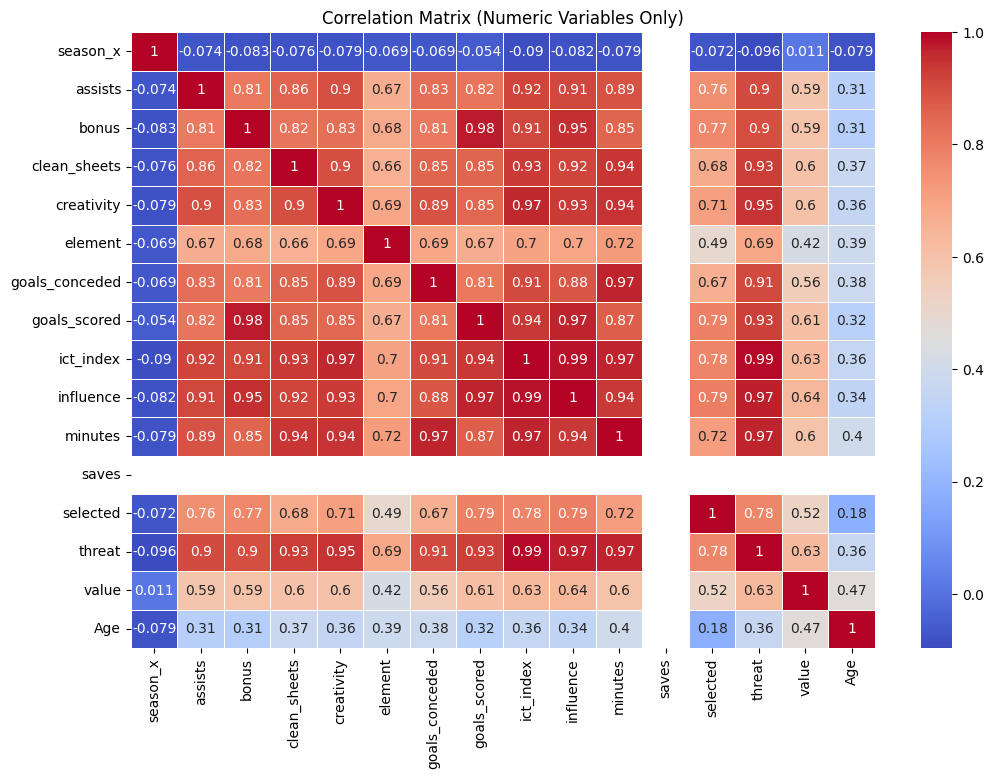

value             1.000000
influence         0.637188
ict_index         0.633949
threat            0.628946
goals_scored      0.614168
clean_sheets      0.598515
creativity        0.598114
minutes           0.597091
bonus             0.594302
assists           0.586694
goals_conceded    0.555219
selected          0.519851
Age               0.468885
element           0.418298
season_x          0.011117
saves                  NaN
Name: value, dtype: float64

In [ ]:
# Exclude the categorical columns 'name_x' and 'team_x'
df_numeric = df_FWD.drop(columns=['name_x', 'team_x'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix_numeric = df_numeric.corr()

# Extract the correlation of 'value' with other variables
value_correlation_numeric = correlation_matrix_numeric["value"].sort_values(ascending=False)

# Plot the correlation matrix for numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Numeric Variables Only)')
plt.show()

# Display the top correlations with 'value'
value_correlation_numeric

In [ ]:

# Seleccionar las variables con alta correlación
selected_features = ['influence', 'ict_index', 'threat', 'goals_scored', 'bonus', 'creativity', 'clean_sheets', 'minutes', 'assists', 'goals_conceded', 'selected', 'element', 'Age']
target_variable = 'value'

# Crear los datasets de entrada (X) y salida (y)
X = df_numeric[selected_features]
y = df_numeric[target_variable]

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros manualmente
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Entrenar el modelo con los hiperparámetros ajustados manualmente
rf_model_optimized.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_opt = rf_model_optimized.predict(X_train)
y_pred_test_opt = rf_model_optimized.predict(X_test)

# Evaluar el modelo
mae_train_opt = mean_absolute_error(y_train, y_pred_train_opt)
mae_test_opt = mean_absolute_error(y_test, y_pred_test_opt)
rmse_train_opt = mean_squared_error(y_train, y_pred_train_opt, squared=False)
rmse_test_opt = mean_squared_error(y_test, y_pred_test_opt, squared=False)
r2_train_opt = r2_score(y_train, y_pred_train_opt)
r2_test_opt = r2_score(y_test, y_pred_test_opt)

# Resultados
results = {
    'MAE Train': mae_train_opt,
    'MAE Test': mae_test_opt,
    'RMSE Train': rmse_train_opt,
    'RMSE Test': rmse_test_opt,
    'R2 Train': r2_train_opt,
    'R2 Test': r2_test_opt
}
print(results)

{'MAE Train': 3.1728457153631653, 'MAE Test': 9.403406521321989, 'RMSE Train': 4.993458246009221, 'RMSE Test': 13.776545190804162, 'R2 Train': 0.8929433060503555, 'R2 Test': 0.4336316060717825}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir una cuadrícula más amplia de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Entrenar el GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Entrenar el modelo con los mejores parámetros
rf_model_optimized = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

rf_model_optimized.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_opt = rf_model_optimized.predict(X_train)
y_pred_test_opt = rf_model_optimized.predict(X_test)

# Evaluar el modelo
mae_train_opt = mean_absolute_error(y_train, y_pred_train_opt)
mae_test_opt = mean_absolute_error(y_test, y_pred_test_opt)
rmse_train_opt = mean_squared_error(y_train, y_pred_train_opt, squared=False)
rmse_test_opt = mean_squared_error(y_test, y_pred_test_opt, squared=False)
r2_train_opt = r2_score(y_train, y_pred_train_opt)
r2_test_opt = r2_score(y_test, y_pred_test_opt)

# Resultados
results = {
    'MAE Train': mae_train_opt,
    'MAE Test': mae_test_opt,
    'RMSE Train': rmse_train_opt,
    'RMSE Test': rmse_test_opt,
    'R2 Train': r2_train_opt,
    'R2 Test': r2_test_opt
}
print(results)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluar el modelo utilizando K-Fold Cross Validation
rf_model_final = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Realizar validación cruzada
cv_scores = cross_val_score(rf_model_final, X, y, cv=10, scoring='neg_mean_absolute_error')

# Mostrar los resultados de la validación cruzada
cv_results = {
    'CV Mean MAE': -cv_scores.mean(),
    'CV Std MAE': cv_scores.std()
}
print(cv_results)


{'CV Mean MAE': 7.419203726266008, 'CV Std MAE': 1.126755007272194}


In [ ]:
# Crear nuevas características
X['goals_per_minute'] = X['goals_scored'] / X['minutes']
X['assists_per_minute'] = X['assists'] / X['minutes']
X.fillna(0, inplace=True)  # Manejar cualquier valor faltante

# Re-entrenar el modelo con las nuevas características
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model_final.fit(X_train, y_train)
y_pred_train = rf_model_final.predict(X_train)
y_pred_test = rf_model_final.predict(X_test)

# Evaluar el modelo nuevamente
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

results_with_new_features = {
    'MAE Train': mae_train,
    'MAE Test': mae_test,
    'RMSE Train': rmse_train,
    'RMSE Test': rmse_test,
    'R2 Train': r2_train,
    'R2 Test': r2_test
}
print(results_with_new_features)


<ipython-input-24-8b9e70b8aad5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['goals_per_minute'] = X['goals_scored'] / X['minutes']
<ipython-input-24-8b9e70b8aad5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['assists_per_minute'] = X['assists'] / X['minutes']
<ipython-input-24-8b9e70b8aad5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

{'MAE Train': 2.4627153508616204, 'MAE Test': 9.957087979123786, 'RMSE Train': 3.5670942674736703, 'RMSE Test': 13.847366335154147, 'R2 Train': 0.9453688735661109, 'R2 Test': 0.4277935739304666}


In [ ]:

# Seleccionar las variables con alta correlación
selected_features = ['influence', 'ict_index', 'threat', 'goals_scored', 'bonus', 'creativity', 'clean_sheets', 'minutes', 'assists', 'goals_conceded', 'selected', 'element', 'Age']

# Crear nuevas características
df_numeric['goals_per_minute'] = df_numeric['goals_scored'] / df_numeric['minutes']
df_numeric['assists_per_minute'] = df_numeric['assists'] / df_numeric['minutes']
df_numeric.fillna(0, inplace=True)  # Manejar cualquier valor faltante

# Seleccionar las características para el modelo
X = df_numeric[selected_features + ['goals_per_minute', 'assists_per_minute']]
y = df_numeric['value']

# Entrenar el modelo de Random Forest con todos los datos
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

rf_model_optimized.fit(X, y)

# Predecir los valores para la próxima temporada
predicted_values = rf_model_optimized.predict(X)

# Añadir las predicciones al DataFrame original
df_FWD['predicted_value_next_season'] = predicted_values

# Mostrar las primeras filas con las predicciones
print(df_FWD[['name_x', 'team_x', 'value', 'predicted_value_next_season']].head())

# Guardar el DataFrame con las predicciones en un archivo CSV
df_FWD.to_csv('/content/predicted_values_next_season.csv', index=False)

# Descargar el archivo
from google.colab import files
files.download('/content/predicted_values_next_season.csv')


                name_x    team_x      value  predicted_value_next_season
0       Aaron Connolly  Brighton  52.842105                    52.094819
2         Albian Ajeti  West Ham  55.000000                    51.842751
3  Aleksandar Mitrović    Fulham  56.078947                    60.529897
4  Alexandre Lacazette   Arsenal  83.236842                    77.389657
5          Andi Zeqiri  Brighton  50.000000                    49.375486


<ipython-input-28-758459c1ac54>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FWD['predicted_value_next_season'] = predicted_values


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Prediccion de Mediocampistas

In [ ]:
# Dropping the specified columns
columns_to_drop = ['bps', 'fixture', 'kickoff_time', 'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards', 'team_a_score', 'team_h_score', 'total_points', 'transfers_balance', 'transfers_in', 'transfers_out', 'was_home', 'yellow_cards', 'GW', 'Birthdate_y', 'name_y']

df_MID.drop(columns=columns_to_drop, inplace=True)
df_MID= df_MID.groupby(['season_x', 'name_x','team_x']).agg({
    'assists': 'sum',
    'bonus': 'sum',
    'clean_sheets': 'sum',
    'creativity': 'sum',
    'element': 'sum',
    'goals_conceded': 'sum',
    'goals_scored': 'sum',
    'ict_index': 'sum',
    'influence': 'sum',
    'minutes': 'sum',
    'saves': 'sum',
    'selected': 'sum',
    'threat': 'sum',
    'value': 'mean',
    'Age': 'mean'
}).reset_index()

<ipython-input-23-87338361ea47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MID.drop(columns=columns_to_drop, inplace=True)


In [ ]:
# Eliminar jugadores que no tienen valor en 'age'
df_MID= df_MID.dropna(subset=['Age'])


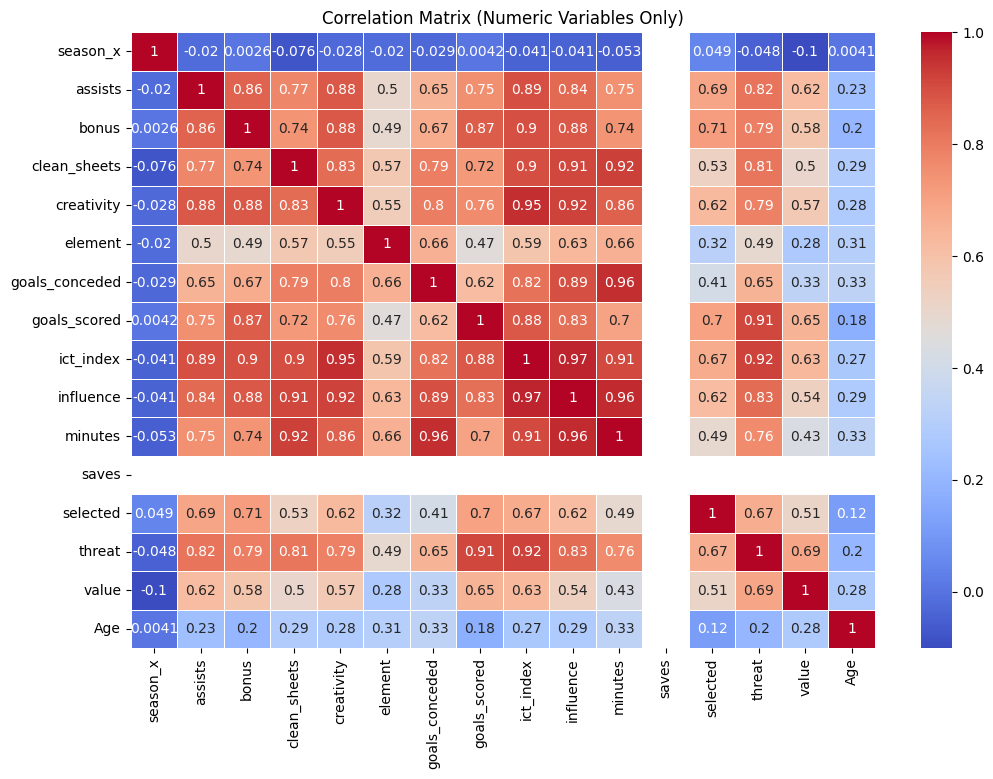

value             1.000000
threat            0.691184
goals_scored      0.649847
ict_index         0.631974
assists           0.619789
bonus             0.584511
creativity        0.566680
influence         0.535213
selected          0.510848
clean_sheets      0.504028
minutes           0.429444
goals_conceded    0.332623
Age               0.280033
element           0.275699
season_x         -0.101032
saves                  NaN
Name: value, dtype: float64

In [ ]:
# Exclude the categorical columns 'name_x' and 'team_x'
df_numeric = df_MID.drop(columns=['name_x', 'team_x'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix_numeric = df_numeric.corr()

# Extract the correlation of 'value' with other variables
value_correlation_numeric = correlation_matrix_numeric["value"].sort_values(ascending=False)

# Plot the correlation matrix for numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Numeric Variables Only)')
plt.show()

# Display the top correlations with 'value'
value_correlation_numeric

In [ ]:

# Seleccionar las variables con alta correlación
selected_features = ['influence', 'ict_index', 'threat', 'goals_scored', 'bonus', 'creativity', 'clean_sheets', 'minutes', 'assists', 'goals_conceded', 'selected', 'element', 'Age']
target_variable = 'value'

# Crear los datasets de entrada (X) y salida (y)
X = df_numeric[selected_features]
y = df_numeric[target_variable]

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros manualmente
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Entrenar el modelo con los hiperparámetros ajustados manualmente
rf_model_optimized.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_opt = rf_model_optimized.predict(X_train)
y_pred_test_opt = rf_model_optimized.predict(X_test)

# Evaluar el modelo
mae_train_opt = mean_absolute_error(y_train, y_pred_train_opt)
mae_test_opt = mean_absolute_error(y_test, y_pred_test_opt)
rmse_train_opt = mean_squared_error(y_train, y_pred_train_opt, squared=False)
rmse_test_opt = mean_squared_error(y_test, y_pred_test_opt, squared=False)
r2_train_opt = r2_score(y_train, y_pred_train_opt)
r2_test_opt = r2_score(y_test, y_pred_test_opt)

# Resultados
results = {
    'MAE Train': mae_train_opt,
    'MAE Test': mae_test_opt,
    'RMSE Train': rmse_train_opt,
    'RMSE Test': rmse_test_opt,
    'R2 Train': r2_train_opt,
    'R2 Test': r2_test_opt
}
print(results)

{'MAE Train': 1.9911713105342657, 'MAE Test': 4.498411287505623, 'RMSE Train': 3.4774823709281626, 'RMSE Test': 8.289590270267873, 'R2 Train': 0.9024867993505604, 'R2 Test': 0.5419625034295656}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir una cuadrícula más amplia de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Entrenar el GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Entrenar el modelo con los mejores parámetros
rf_model_optimized = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

rf_model_optimized.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_opt = rf_model_optimized.predict(X_train)
y_pred_test_opt = rf_model_optimized.predict(X_test)

# Evaluar el modelo
mae_train_opt = mean_absolute_error(y_train, y_pred_train_opt)
mae_test_opt = mean_absolute_error(y_test, y_pred_test_opt)
rmse_train_opt = mean_squared_error(y_train, y_pred_train_opt, squared=False)
rmse_test_opt = mean_squared_error(y_test, y_pred_test_opt, squared=False)
r2_train_opt = r2_score(y_train, y_pred_train_opt)
r2_test_opt = r2_score(y_test, y_pred_test_opt)

# Resultados
results = {
    'MAE Train': mae_train_opt,
    'MAE Test': mae_test_opt,
    'RMSE Train': rmse_train_opt,
    'RMSE Test': rmse_test_opt,
    'R2 Train': r2_train_opt,
    'R2 Test': r2_test_opt
}
print(results)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'MAE Train': 1.9791456598674277, 'MAE Test': 4.516548799208686, 'RMSE Train': 3.4622488989182196, 'RMSE Test': 8.278669266360769, 'R2 Train': 0.9033392614704108, 'R2 Test': 0.5431685785354305}


In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluar el modelo utilizando K-Fold Cross Validation
rf_model_final = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Realizar validación cruzada
cv_scores = cross_val_score(rf_model_final, X, y, cv=10, scoring='neg_mean_absolute_error')

# Mostrar los resultados de la validación cruzada
cv_results = {
    'CV Mean MAE': -cv_scores.mean(),
    'CV Std MAE': cv_scores.std()
}
print(cv_results)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

{'CV Mean MAE': 4.291573578969269, 'CV Std MAE': 0.9298666481324728}


In [ ]:
# Crear nuevas características
X['goals_per_minute'] = X['goals_scored'] / X['minutes']
X['assists_per_minute'] = X['assists'] / X['minutes']
X.fillna(0, inplace=True)  # Manejar cualquier valor faltante

# Re-entrenar el modelo con las nuevas características
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model_final.fit(X_train, y_train)
y_pred_train = rf_model_final.predict(X_train)
y_pred_test = rf_model_final.predict(X_test)

# Evaluar el modelo nuevamente
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

results_with_new_features = {
    'MAE Train': mae_train,
    'MAE Test': mae_test,
    'RMSE Train': rmse_train,
    'RMSE Test': rmse_test,
    'R2 Train': r2_train,
    'R2 Test': r2_test
}
print(results_with_new_features)


<ipython-input-35-8b9e70b8aad5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['goals_per_minute'] = X['goals_scored'] / X['minutes']
<ipython-input-35-8b9e70b8aad5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['assists_per_minute'] = X['assists'] / X['minutes']
<ipython-input-35-8b9e70b8aad5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

{'MAE Train': 1.9559311548540925, 'MAE Test': 4.5753074547161745, 'RMSE Train': 3.389663172652134, 'RMSE Test': 8.274648359433549, 'R2 Train': 0.9073497432270584, 'R2 Test': 0.5436122320955151}


In [ ]:

# Seleccionar las variables con alta correlación
selected_features = ['influence', 'ict_index', 'threat', 'goals_scored', 'bonus', 'creativity', 'clean_sheets', 'minutes', 'assists', 'goals_conceded', 'selected', 'element', 'Age']

# Crear nuevas características
df_numeric['goals_per_minute'] = df_numeric['goals_scored'] / df_numeric['minutes']
df_numeric['assists_per_minute'] = df_numeric['assists'] / df_numeric['minutes']
df_numeric.fillna(0, inplace=True)  # Manejar cualquier valor faltante

# Seleccionar las características para el modelo
X = df_numeric[selected_features + ['goals_per_minute', 'assists_per_minute']]
y = df_numeric['value']

# Entrenar el modelo de Random Forest con todos los datos
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

rf_model_optimized.fit(X, y)

# Predecir los valores para la próxima temporada
predicted_values = rf_model_optimized.predict(X)

# Añadir las predicciones al DataFrame original
df_MID['predicted_value_next_season'] = predicted_values

# Mostrar las primeras filas con las predicciones
print(df_MID[['name_x', 'team_x', 'value', 'predicted_value_next_season']].head())

# Guardar el DataFrame con las predicciones en un archivo CSV
df_MID.to_csv('/content/predicted_values_next_season.csv', index=False)

# Descargar el archivo
from google.colab import files
files.download('/content/predicted_values_next_season.csv')


               name_x    team_x      value  predicted_value_next_season
0          Aaron Mooy  Brighton  50.000000                    48.676840
1  Abdoulaye Doucouré   Everton  52.552632                    52.163693
3        Adam Forshaw     Leeds  48.210526                    48.985413
4        Adam Lallana  Brighton  62.342105                    57.308325
5        Adama Traoré    Wolves  61.368421                    59.166904


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Prediccion Defensas

In [ ]:
# Dropping the specified columns
columns_to_drop = ['bps', 'fixture', 'kickoff_time', 'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards', 'team_a_score', 'team_h_score', 'total_points', 'transfers_balance', 'transfers_in', 'transfers_out', 'was_home', 'yellow_cards', 'GW', 'Birthdate_y', 'name_y']

df_DEF.drop(columns=columns_to_drop, inplace=True)


KeyError: "['bps', 'fixture', 'kickoff_time', 'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards', 'team_a_score', 'team_h_score', 'total_points', 'transfers_balance', 'transfers_in', 'transfers_out', 'was_home', 'yellow_cards', 'GW', 'Birthdate_y', 'name_y'] not found in axis"

In [ ]:
df_DEF= df_DEF.groupby(['season_x', 'name_x','team_x']).agg({
    'assists': 'sum',
    'bonus': 'sum',
    'clean_sheets': 'sum',
    'creativity': 'sum',
    'element': 'sum',
    'goals_conceded': 'sum',
    'goals_scored': 'sum',
    'ict_index': 'sum',
    'influence': 'sum',
    'minutes': 'sum',
    'saves': 'sum',
    'selected': 'sum',
    'threat': 'sum',
    'value': 'mean',
    'Age': 'mean'
}).reset_index()

In [ ]:
# Eliminar jugadores que no tienen valor en 'age'
df_DEF= df_DEF.dropna(subset=['Age'])


In [ ]:
import pandas as pd

# Filtrar jugadores que no tienen valor en 'age'
players_without_age = df_DEF[df_DEF['Age'].isna()]['name_x'].tolist()

# Mostrar los nombres de los jugadores sin edad
print(players_without_age)



[]


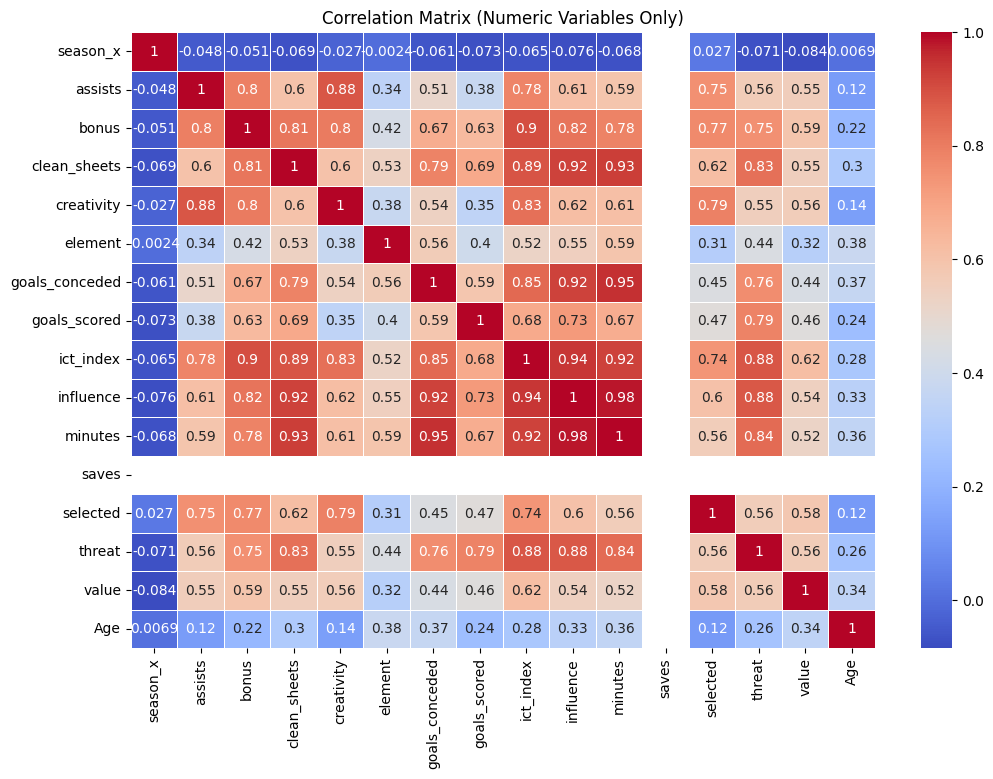

value             1.000000
ict_index         0.618582
bonus             0.591639
selected          0.584889
threat            0.561434
creativity        0.559205
assists           0.553833
clean_sheets      0.550496
influence         0.540690
minutes           0.522013
goals_scored      0.464591
goals_conceded    0.435208
Age               0.344389
element           0.321699
season_x         -0.084281
saves                  NaN
Name: value, dtype: float64

In [ ]:
# Exclude the categorical columns 'name_x' and 'team_x'
df_numeric = df_DEF.drop(columns=['name_x', 'team_x'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix_numeric = df_numeric.corr()

# Extract the correlation of 'value' with other variables
value_correlation_numeric = correlation_matrix_numeric["value"].sort_values(ascending=False)

# Plot the correlation matrix for numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Numeric Variables Only)')
plt.show()

# Display the top correlations with 'value'
value_correlation_numeric

In [ ]:

# Seleccionar las variables con alta correlación
selected_features = ['influence', 'ict_index', 'threat', 'goals_scored', 'bonus', 'creativity', 'clean_sheets', 'minutes', 'assists', 'goals_conceded', 'selected', 'element', 'Age']
target_variable = 'value'

# Crear los datasets de entrada (X) y salida (y)
X = df_numeric[selected_features]
y = df_numeric[target_variable]

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros manualmente
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Entrenar el modelo con los hiperparámetros ajustados manualmente
rf_model_optimized.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_opt = rf_model_optimized.predict(X_train)
y_pred_test_opt = rf_model_optimized.predict(X_test)

# Evaluar el modelo
mae_train_opt = mean_absolute_error(y_train, y_pred_train_opt)
mae_test_opt = mean_absolute_error(y_test, y_pred_test_opt)
rmse_train_opt = mean_squared_error(y_train, y_pred_train_opt, squared=False)
rmse_test_opt = mean_squared_error(y_test, y_pred_test_opt, squared=False)
r2_train_opt = r2_score(y_train, y_pred_train_opt)
r2_test_opt = r2_score(y_test, y_pred_test_opt)

# Resultados
results = {
    'MAE Train': mae_train_opt,
    'MAE Test': mae_test_opt,
    'RMSE Train': rmse_train_opt,
    'RMSE Test': rmse_test_opt,
    'R2 Train': r2_train_opt,
    'R2 Test': r2_test_opt
}
print(results)

{'MAE Train': 1.2329962511294925, 'MAE Test': 2.6896527110602673, 'RMSE Train': 1.88059990896947, 'RMSE Test': 3.795068481330872, 'R2 Train': 0.8747716046683849, 'R2 Test': 0.5636948600064451}


In [ ]:
# Crear nuevas características
X['goals_per_minute'] = X['goals_scored'] / X['minutes']
X['assists_per_minute'] = X['assists'] / X['minutes']
X.fillna(0, inplace=True)  # Manejar cualquier valor faltante

# Re-entrenar el modelo con las nuevas características
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model_final.fit(X_train, y_train)
y_pred_train = rf_model_final.predict(X_train)
y_pred_test = rf_model_final.predict(X_test)

# Evaluar el modelo nuevamente
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

results_with_new_features = {
    'MAE Train': mae_train,
    'MAE Test': mae_test,
    'RMSE Train': rmse_train,
    'RMSE Test': rmse_test,
    'R2 Train': r2_train,
    'R2 Test': r2_test
}
print(results_with_new_features)


<ipython-input-45-8b9e70b8aad5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['goals_per_minute'] = X['goals_scored'] / X['minutes']
<ipython-input-45-8b9e70b8aad5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['assists_per_minute'] = X['assists'] / X['minutes']
<ipython-input-45-8b9e70b8aad5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

{'MAE Train': 1.2230432423900441, 'MAE Test': 2.605940994358753, 'RMSE Train': 1.8689018189609252, 'RMSE Test': 3.597022580453983, 'R2 Train': 0.8763247014180345, 'R2 Test': 0.608043903883801}


In [ ]:

# Seleccionar las variables con alta correlación
selected_features = ['influence', 'ict_index', 'threat', 'goals_scored', 'bonus', 'creativity', 'clean_sheets', 'minutes', 'assists', 'goals_conceded', 'selected', 'element', 'Age']

# Crear nuevas características
df_numeric['goals_per_minute'] = df_numeric['goals_scored'] / df_numeric['minutes']
df_numeric['assists_per_minute'] = df_numeric['assists'] / df_numeric['minutes']
df_numeric.fillna(0, inplace=True)  # Manejar cualquier valor faltante

# Seleccionar las características para el modelo
X = df_numeric[selected_features + ['goals_per_minute', 'assists_per_minute']]
y = df_numeric['value']

# Entrenar el modelo de Random Forest con todos los datos
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

rf_model_optimized.fit(X, y)

# Predecir los valores para la próxima temporada
predicted_values = rf_model_optimized.predict(X)

# Añadir las predicciones al DataFrame original
df_DEF['predicted_value_next_season'] = predicted_values

# Mostrar las primeras filas con las predicciones
print(df_DEF[['name_x', 'team_x', 'value', 'predicted_value_next_season']].head())

# Guardar el DataFrame con las predicciones en un archivo CSV
df_DEF.to_csv('/content/predicted_values_next_season.csv', index=False)

# Descargar el archivo
from google.colab import files
files.download('/content/predicted_values_next_season.csv')


                   name_x     team_x      value  predicted_value_next_season
0         Aaron Cresswell   West Ham  54.236842                    57.013304
1       Aaron Wan-Bissaka    Man Utd  55.105263                    55.588897
2            Adam Webster   Brighton  43.842105                    45.216858
5  Ainsley Maitland-Niles    Arsenal  47.428571                    46.507508
6  Ainsley Maitland-Niles  West Brom  46.000000                    46.132565


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Prediccion Porteros


In [ ]:
# Dropping the specified columns
columns_to_drop = ['goals_scored','assists','creativity','threat','round','bps', 'fixture', 'position','kickoff_time', 'opponent_team', 'opp_team_name', 'penalties_missed', 'red_cards', 'team_a_score', 'team_h_score', 'total_points', 'transfers_balance', 'transfers_in', 'transfers_out', 'was_home', 'yellow_cards', 'GW', 'Birthdate_y', 'name_y']

df_GK.drop(columns=columns_to_drop, inplace=True)


<ipython-input-41-2868046e8eb1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GK.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df_GK = df_GK.groupby(['season_x', 'name_x','team_x']).agg({
   'bonus': 'sum',
    'clean_sheets': 'sum',
    'element': 'sum',
    'goals_conceded': 'sum',
    'ict_index': 'sum',
    'influence': 'sum',
    'minutes': 'sum',
    'saves': 'sum',
    'selected': 'sum',
    'value': 'mean',
    'Age': 'mean'
}).reset_index()

In [ ]:
# Eliminar jugadores que no tienen valor en 'age'
df_GK= df_GK.dropna(subset=['Age'])

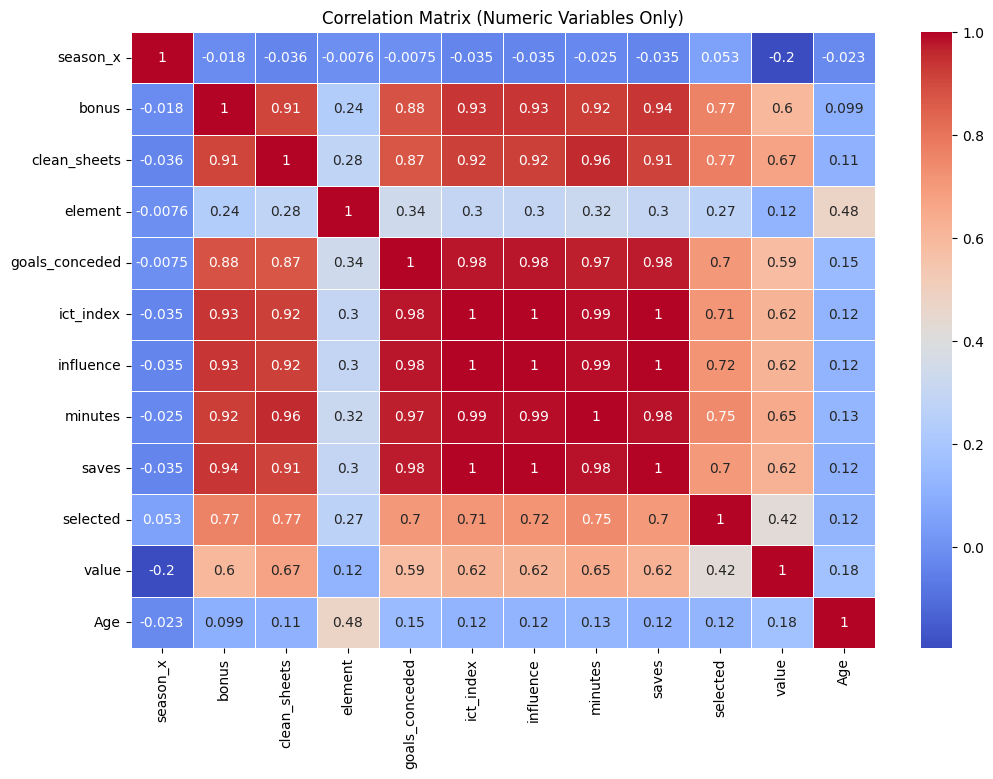

value             1.000000
clean_sheets      0.669087
minutes           0.646199
saves             0.622706
influence         0.620004
ict_index         0.618247
bonus             0.601253
goals_conceded    0.586627
selected          0.422429
Age               0.175089
element           0.119101
season_x         -0.196360
Name: value, dtype: float64

In [ ]:

# Exclude the categorical columns 'name_x' and 'team_x'
df_numeric = df_GK.drop(columns=['name_x', 'team_x'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix_numeric = df_numeric.corr()

# Extract the correlation of 'value' with other variables
value_correlation_numeric = correlation_matrix_numeric["value"].sort_values(ascending=False)

# Plot the correlation matrix for numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Numeric Variables Only)')
plt.show()

# Display the top correlations with 'value'
value_correlation_numeric

In [ ]:

# Seleccionar las variables con alta correlación
selected_features = ['minutes','influence','ict_index','saves','selected','bonus','goals_conceded','clean_sheets', 'Age','season_x','element']
target_variable = 'value'

# Crear los datasets de entrada (X) y salida (y)
X = df_numeric[selected_features]
y = df_numeric[target_variable]

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros manualmente
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Entrenar el modelo con los hiperparámetros ajustados manualmente
rf_model_optimized.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_opt = rf_model_optimized.predict(X_train)
y_pred_test_opt = rf_model_optimized.predict(X_test)

# Evaluar el modelo
mae_train_opt = mean_absolute_error(y_train, y_pred_train_opt)
mae_test_opt = mean_absolute_error(y_test, y_pred_test_opt)
rmse_train_opt = mean_squared_error(y_train, y_pred_train_opt, squared=False)
rmse_test_opt = mean_squared_error(y_test, y_pred_test_opt, squared=False)
r2_train_opt = r2_score(y_train, y_pred_train_opt)
r2_test_opt = r2_score(y_test, y_pred_test_opt)

# Resultados
results = {
    'MAE Train': mae_train_opt,
    'MAE Test': mae_test_opt,
    'RMSE Train': rmse_train_opt,
    'RMSE Test': rmse_test_opt,
    'R2 Train': r2_train_opt,
    'R2 Test': r2_test_opt
}
print(results)

{'MAE Train': 0.9439805380375093, 'MAE Test': 2.733948804101776, 'RMSE Train': 1.4283133008778308, 'RMSE Test': 3.8842077676966356, 'R2 Train': 0.8866235420823886, 'R2 Test': 0.13049701509150802}


In [ ]:
# Seleccionar las variables con alta correlación
selected_features = ['minutes','influence','ict_index','saves','selected','bonus','goals_conceded','clean_sheets', 'Age','season_x','element']
# Crear nuevas características
df_numeric['savesxminute'] = df_numeric['saves'] / df_numeric['minutes']
df_numeric['clean_sheetsxminute'] = df_numeric['clean_sheets'] / df_numeric['minutes']
df_numeric.fillna(0, inplace=True)  # Manejar cualquier valor faltante

# Seleccionar las características para el modelo
X = df_numeric[selected_features + ['savesxminute', 'clean_sheetsxminute']]
y = df_numeric['value']

# Entrenar el modelo de Random Forest con todos los datos
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

rf_model_optimized.fit(X, y)

# Predecir los valores para la próxima temporada
predicted_values = rf_model_optimized.predict(X)

# Añadir las predicciones al DataFrame original
df_GK['predicted_value_next_season'] = predicted_values

# Mostrar las primeras filas con las predicciones
print(df_GK[['name_x', 'team_x', 'value', 'predicted_value_next_season']].head())

# Guardar el DataFrame con las predicciones en un archivo CSV
df_GK.to_csv('/content/predicted_values_next_season.csv', index=False)

# Descargar el archivo
from google.colab import files
files.download('/content/predicted_values_next_season.csv')


                   name_x         team_x      value  \
0          Aaron Ramsdale  Sheffield Utd  47.157895   
2           Alex McCarthy    Southampton  45.210526   
6           Andy Lonergan      West Brom  40.000000   
7              Angus Gunn    Southampton  43.368421   
8  Bailey Peacock-Farrell        Burnley  40.000000   

   predicted_value_next_season  
0                    47.108214  
2                    47.059977  
6                    41.762912  
7                    42.287705  
8                    41.159551  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Performance Malo de Delanteros DF

In [ ]:


# Exclude the categorical columns 'name_x' and 'team_x'
df_numeric = df_FWD.drop(columns=['name_x', 'team_x'])


# Seleccionar las variables con alta correlación
selected_features = ['influence', 'ict_index', 'threat', 'goals_scored', 'bonus', 'creativity', 'clean_sheets', 'minutes', 'assists', 'goals_conceded', 'selected', 'element', 'Age']
target_variable = 'value'

# Crear una función para ajustar las variables
def adjust_performance(df, columns, increase_bad=True, decrease_good=True, factor_range=(0.1, 0.2)):
    adjusted_df = df.copy()
    for col in columns:
        factor = np.random.uniform(factor_range[0], factor_range[1])
        if col in ['goals_scored', 'bonus', 'clean_sheets', 'minutes', 'assists', 'influence', 'ict_index', 'threat', 'creativity','selected']:
            if decrease_good:
                adjusted_df[col] *= (1 - factor)
        elif col in ['goals_conceded']:
            if increase_bad:
                adjusted_df[col] *= (1 + factor)
    return adjusted_df

# Ajustar el rendimiento
df_adjusted = adjust_performance(df_numeric, selected_features)




# Crear los datasets de entrada (X) y salida (y)
X = df_adjusted[selected_features]
y = df_adjusted[target_variable]

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros manualmente
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Entrenar el modelo con los hiperparámetros ajustados manualmente
rf_model_optimized.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_opt = rf_model_optimized.predict(X_train)
y_pred_test_opt = rf_model_optimized.predict(X_test)

# Evaluar el modelo
mae_train_opt = mean_absolute_error(y_train, y_pred_train_opt)
mae_test_opt = mean_absolute_error(y_test, y_pred_test_opt)
rmse_train_opt = mean_squared_error(y_train, y_pred_train_opt, squared=False)
rmse_test_opt = mean_squared_error(y_test, y_pred_test_opt, squared=False)
r2_train_opt = r2_score(y_train, y_pred_train_opt)
r2_test_opt = r2_score(y_test, y_pred_test_opt)

# Resultados
results = {
    'MAE Train': mae_train_opt,
    'MAE Test': mae_test_opt,
    'RMSE Train': rmse_train_opt,
    'RMSE Test': rmse_test_opt,
    'R2 Train': r2_train_opt,
    'R2 Test': r2_test_opt
}
print(results)

# Predecir los valores para la próxima temporada
predicted_values = rf_model_optimized.predict(X)

# Añadir las predicciones al DataFrame original
df_FWD['predicted_value_next_season'] = predicted_values
df_numeric['predicted_value_next_season'] = predicted_values
df_numeric['name'] = df_FWD['name_x']

# Ajustar el rendimiento y guardar en df_malo
df_malo_delanteros = adjust_performance(df_numeric, selected_features)
df_malo_delanteros.to_csv('df_malo_delanteros.csv', index=False)


# Descargar el archivo CSV
files.download('df_malo_delanteros.csv')


{'MAE Train': 3.1729790066604724, 'MAE Test': 9.40438618262431, 'RMSE Train': 4.993546281487614, 'RMSE Test': 13.776686702322872, 'R2 Train': 0.8929395311633402, 'R2 Test': 0.43361997063458135}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Prediccion Mala Medio Campistas

In [ ]:

# Exclude the categorical columns 'name_x' and 'team_x'
df_numeric = df_MID.drop(columns=['name_x', 'team_x'])


# Seleccionar las variables con alta correlación
selected_features = ['influence', 'ict_index', 'threat', 'goals_scored', 'bonus', 'creativity', 'clean_sheets', 'minutes', 'assists', 'goals_conceded', 'selected', 'element', 'Age']
target_variable = 'value'

# Crear una función para ajustar las variables
def adjust_performance(df, columns, increase_bad=True, decrease_good=True, factor_range=(0.1, 0.2)):
    adjusted_df = df.copy()
    for col in columns:
        factor = np.random.uniform(factor_range[0], factor_range[1])
        if col in ['goals_scored', 'bonus', 'clean_sheets', 'minutes', 'assists', 'influence', 'ict_index', 'threat', 'creativity','selected']:
            if decrease_good:
                adjusted_df[col] *= (1 - factor)
        elif col in ['goals_conceded']:
            if increase_bad:
                adjusted_df[col] *= (1 + factor)
    return adjusted_df

# Ajustar el rendimiento
df_adjusted = adjust_performance(df_numeric, selected_features)



# Crear los datasets de entrada (X) y salida (y)
X = df_adjusted[selected_features]
y = df_adjusted[target_variable]

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros manualmente
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Entrenar el modelo con los hiperparámetros ajustados manualmente
rf_model_optimized.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_opt = rf_model_optimized.predict(X_train)
y_pred_test_opt = rf_model_optimized.predict(X_test)

# Evaluar el modelo
mae_train_opt = mean_absolute_error(y_train, y_pred_train_opt)
mae_test_opt = mean_absolute_error(y_test, y_pred_test_opt)
rmse_train_opt = mean_squared_error(y_train, y_pred_train_opt, squared=False)
rmse_test_opt = mean_squared_error(y_test, y_pred_test_opt, squared=False)
r2_train_opt = r2_score(y_train, y_pred_train_opt)
r2_test_opt = r2_score(y_test, y_pred_test_opt)

# Resultados
results = {
    'MAE Train': mae_train_opt,
    'MAE Test': mae_test_opt,
    'RMSE Train': rmse_train_opt,
    'RMSE Test': rmse_test_opt,
    'R2 Train': r2_train_opt,
    'R2 Test': r2_test_opt
}
print(results)


#quiero el nombre de los jugadores del df_mid

predicted_values = rf_model_optimized.predict(X)

df_numeric['predicted_value_next_season'] = predicted_values
df_numeric['name'] = df_MID['name_x']

# Ajustar el rendimiento y guardar en df_malo
df_malo_mediocampo = adjust_performance(df_numeric, selected_features)
df_malo_mediocampo.to_csv('df_malo_mediocampo.csv', index=False)

# Descargar el archivo CSV
files.download('df_malo_mediocampo.csv')


{'MAE Train': 1.9917661557416881, 'MAE Test': 4.498010495817434, 'RMSE Train': 3.47748301684449, 'RMSE Test': 8.287880346823732, 'R2 Train': 0.9024867631258624, 'R2 Test': 0.5421514460070589}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Prediccion Malo Defensas


In [ ]:

# Exclude the categorical columns 'name_x' and 'team_x'
df_numeric = df_DEF.drop(columns=['name_x', 'team_x'])


# Seleccionar las variables con alta correlación
selected_features = ['influence', 'ict_index', 'threat', 'goals_scored', 'bonus', 'creativity', 'clean_sheets', 'minutes', 'assists', 'goals_conceded', 'selected', 'element', 'Age']
target_variable = 'value'

# Crear una función para ajustar las variables
def adjust_performance(df, columns, increase_bad=True, decrease_good=True, factor_range=(0.1, 0.2)):
    adjusted_df = df.copy()
    for col in columns:
        factor = np.random.uniform(factor_range[0], factor_range[1])
        if col in ['goals_scored', 'bonus', 'clean_sheets', 'minutes', 'assists', 'influence', 'ict_index', 'threat', 'creativity','selected']:
            if decrease_good:
                adjusted_df[col] *= (1 - factor)
        elif col in ['goals_conceded']:
            if increase_bad:
                adjusted_df[col] *= (1 + factor)
    return adjusted_df

# Ajustar el rendimiento
df_adjusted = adjust_performance(df_numeric, selected_features)



# Crear los datasets de entrada (X) y salida (y)
X = df_adjusted[selected_features]
y = df_adjusted[target_variable]

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros manualmente
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Entrenar el modelo con los hiperparámetros ajustados manualmente
rf_model_optimized.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_opt = rf_model_optimized.predict(X_train)
y_pred_test_opt = rf_model_optimized.predict(X_test)

# Evaluar el modelo
mae_train_opt = mean_absolute_error(y_train, y_pred_train_opt)
mae_test_opt = mean_absolute_error(y_test, y_pred_test_opt)
rmse_train_opt = mean_squared_error(y_train, y_pred_train_opt, squared=False)
rmse_test_opt = mean_squared_error(y_test, y_pred_test_opt, squared=False)
r2_train_opt = r2_score(y_train, y_pred_train_opt)
r2_test_opt = r2_score(y_test, y_pred_test_opt)

# Resultados
results = {
    'MAE Train': mae_train_opt,
    'MAE Test': mae_test_opt,
    'RMSE Train': rmse_train_opt,
    'RMSE Test': rmse_test_opt,
    'R2 Train': r2_train_opt,
    'R2 Test': r2_test_opt
}
print(results)

# Ajustar el rendimiento y guardar en df_malo
predicted_values = rf_model_optimized.predict(X)

df_numeric['predicted_value_next_season'] = predicted_values
df_numeric['name'] = df_DEF['name_x']

df_malo_defensas = adjust_performance(df_numeric, selected_features)
df_malo_defensas.to_csv('df_malo_defensas.csv', index=False)
# Descargar el archivo CSV
files.download('df_malo_defensas.csv')



{'MAE Train': 1.2325273199005262, 'MAE Test': 2.6900300538883504, 'RMSE Train': 1.880495705203648, 'RMSE Test': 3.795316137209211, 'R2 Train': 0.8747854820580307, 'R2 Test': 0.5636379139677421}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Prediccion Malo Porteros

In [ ]:

# Exclude the categorical columns 'name_x' and 'team_x'
df_numeric = df_GK.drop(columns=['name_x', 'team_x'])


selected_features = ['minutes','influence','ict_index','saves','selected','bonus','goals_conceded','clean_sheets', 'Age','season_x','element']
target_variable = 'value'

# Crear una función para ajustar las variables
def adjust_performance(df, columns, increase_bad=True, decrease_good=True, factor_range=(0.1, 0.2)):
    adjusted_df = df.copy()
    for col in columns:
        factor = np.random.uniform(factor_range[0], factor_range[1])
        if col in ['minutes', 'bonus', 'clean_sheets', 'saves', 'influence', 'ict_index', 'threat', 'creativity','selected']:
            if decrease_good:
                adjusted_df[col] *= (1 - factor)
        elif col in ['goals_conceded']:
            if increase_bad:
                adjusted_df[col] *= (1 + factor)
    return adjusted_df

# Ajustar el rendimiento
df_adjusted = adjust_performance(df_numeric, selected_features)


# Crear los datasets de entrada (X) y salida (y)
X = df_adjusted[selected_features]
y = df_adjusted[target_variable]

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros manualmente
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Entrenar el modelo con los hiperparámetros ajustados manualmente
rf_model_optimized.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_opt = rf_model_optimized.predict(X_train)
y_pred_test_opt = rf_model_optimized.predict(X_test)

# Evaluar el modelo
mae_train_opt = mean_absolute_error(y_train, y_pred_train_opt)
mae_test_opt = mean_absolute_error(y_test, y_pred_test_opt)
rmse_train_opt = mean_squared_error(y_train, y_pred_train_opt, squared=False)
rmse_test_opt = mean_squared_error(y_test, y_pred_test_opt, squared=False)
r2_train_opt = r2_score(y_train, y_pred_train_opt)
r2_test_opt = r2_score(y_test, y_pred_test_opt)

# Resultados
results = {
    'MAE Train': mae_train_opt,
    'MAE Test': mae_test_opt,
    'RMSE Train': rmse_train_opt,
    'RMSE Test': rmse_test_opt,
    'R2 Train': r2_train_opt,
    'R2 Test': r2_test_opt
}
print(results)

predicted_values = rf_model_optimized.predict(X)
df_numeric['predicted_value_next_season'] = predicted_values
df_numeric['name'] = df_GK['name_x']


# Ajustar el rendimiento y guardar en df_malo
df_malo_porteros = adjust_performance(df_numeric, selected_features)
df_malo_porteros.to_csv('df_malo_porteros.csv', index=False)
# Descargar el archivo CSV
files.download('df_malo_porteros.csv')




{'MAE Train': 0.9441631493083198, 'MAE Test': 2.7336451334492153, 'RMSE Train': 1.428262542312275, 'RMSE Test': 3.8832481160975534, 'R2 Train': 0.8866316001521585, 'R2 Test': 0.130926609439603}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Prediccion Bueno Delanteros

In [ ]:

# Exclude the categorical columns 'name_x' and 'team_x'
df_numeric = df_FWD.drop(columns=['name_x', 'team_x'])


# Seleccionar las variables con alta correlación
selected_features = ['influence', 'ict_index', 'threat', 'goals_scored', 'bonus', 'creativity', 'clean_sheets', 'minutes', 'assists', 'goals_conceded', 'selected', 'element', 'Age']
target_variable = 'value'

# Crear una función para ajustar las variables (inversa)
def adjust_performance_inverse(df, columns, increase_good=True, decrease_bad=True, factor_range=(0.1, 0.2)):
    adjusted_df = df.copy()
    for col in columns:
        factor = np.random.uniform(factor_range[0], factor_range[1])
        if col in ['goals_scored', 'bonus', 'clean_sheets', 'minutes', 'assists', 'influence', 'ict_index', 'threat', 'creativity']:
            if increase_good:
                adjusted_df[col] *= (1 + factor)
        elif col in ['goals_conceded', 'selected']:
            if decrease_bad:
                adjusted_df[col] *= (1 - factor)
    return adjusted_df

# Ajustar el rendimiento y guardar en df_bueno
df_bueno = adjust_performance_inverse(df_numeric, selected_features)

# Crear los datasets de entrada (X) y salida (y)
X = df_bueno[selected_features]
y = df_bueno[target_variable]


# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros manualmente
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Entrenar el modelo con los hiperparámetros ajustados manualmente
rf_model_optimized.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_opt = rf_model_optimized.predict(X_train)
y_pred_test_opt = rf_model_optimized.predict(X_test)

# Evaluar el modelo
mae_train_opt = mean_absolute_error(y_train, y_pred_train_opt)
mae_test_opt = mean_absolute_error(y_test, y_pred_test_opt)
rmse_train_opt = mean_squared_error(y_train, y_pred_train_opt, squared=False)
rmse_test_opt = mean_squared_error(y_test, y_pred_test_opt, squared=False)
r2_train_opt = r2_score(y_train, y_pred_train_opt)
r2_test_opt = r2_score(y_test, y_pred_test_opt)

# Resultados
results = {
    'MAE Train': mae_train_opt,
    'MAE Test': mae_test_opt,
    'RMSE Train': rmse_train_opt,
    'RMSE Test': rmse_test_opt,
    'R2 Train': r2_train_opt,
    'R2 Test': r2_test_opt
}
print(results)



predicted_values = rf_model_optimized.predict(X)
df_numeric['predicted_value_next_season'] = predicted_values
df_numeric['name'] = df_FWD['name_x']

# Ajustar el rendimiento y guardar en df_malo
df_bueno_delanteros = adjust_performance(df_numeric, selected_features)
df_bueno_delanteros.to_csv('df_bueno_delanteros.csv', index=False)
# Descargar el archivo CSV
files.download('df_bueno_delanteros.csv')



{'MAE Train': 3.17361511272051, 'MAE Test': 9.400173139943393, 'RMSE Train': 4.994214187718189, 'RMSE Test': 13.772432945432366, 'R2 Train': 0.8929108897400793, 'R2 Test': 0.4339696731515671}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Prediccion Buena Mid

In [ ]:

# Exclude the categorical columns 'name_x' and 'team_x'
df_numeric = df_MID.drop(columns=['name_x', 'team_x'])


# Seleccionar las variables con alta correlación
selected_features = ['influence', 'ict_index', 'threat', 'goals_scored', 'bonus', 'creativity', 'clean_sheets', 'minutes', 'assists', 'goals_conceded', 'selected', 'element', 'Age']
target_variable = 'value'

# Crear una función para ajustar las variables (inversa)
def adjust_performance_inverse(df, columns, increase_good=True, decrease_bad=True, factor_range=(0.1, 0.2)):
    adjusted_df = df.copy()
    for col in columns:
        factor = np.random.uniform(factor_range[0], factor_range[1])
        if col in ['goals_scored', 'bonus', 'clean_sheets', 'minutes', 'assists', 'influence', 'ict_index', 'threat', 'creativity']:
            if increase_good:
                adjusted_df[col] *= (1 + factor)
        elif col in ['goals_conceded']:
            if decrease_bad:
                adjusted_df[col] *= (1 - factor)
    return adjusted_df

# Ajustar el rendimiento y guardar en df_bueno
df_bueno = adjust_performance_inverse(df_numeric, selected_features)

# Crear los datasets de entrada (X) y salida (y)
X = df_bueno[selected_features]
y = df_bueno[target_variable]



# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros manualmente
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Entrenar el modelo con los hiperparámetros ajustados manualmente
rf_model_optimized.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_opt = rf_model_optimized.predict(X_train)
y_pred_test_opt = rf_model_optimized.predict(X_test)

# Evaluar el modelo
mae_train_opt = mean_absolute_error(y_train, y_pred_train_opt)
mae_test_opt = mean_absolute_error(y_test, y_pred_test_opt)
rmse_train_opt = mean_squared_error(y_train, y_pred_train_opt, squared=False)
rmse_test_opt = mean_squared_error(y_test, y_pred_test_opt, squared=False)
r2_train_opt = r2_score(y_train, y_pred_train_opt)
r2_test_opt = r2_score(y_test, y_pred_test_opt)

# Resultados
results = {
    'MAE Train': mae_train_opt,
    'MAE Test': mae_test_opt,
    'RMSE Train': rmse_train_opt,
    'RMSE Test': rmse_test_opt,
    'R2 Train': r2_train_opt,
    'R2 Test': r2_test_opt
}
print(results)

predicted_values = rf_model_optimized.predict(X)
df_numeric['predicted_value_next_season'] = predicted_values
df_numeric['name'] = df_MID['name_x']

# Ajustar el rendimiento y guardar en df_malo
df_bueno_mid = adjust_performance(df_numeric, selected_features)
df_bueno_mid.to_csv('df_bueno_mid.csv', index=False)
# Descargar el archivo CSV
files.download('df_bueno_mid.csv')



{'MAE Train': 1.9906030509199464, 'MAE Test': 4.498433305353, 'RMSE Train': 3.4773399928051862, 'RMSE Test': 8.289445449240139, 'R2 Train': 0.9024947841284962, 'R2 Test': 0.541978507328287}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Prediccion Buena Defensas

In [ ]:

# Exclude the categorical columns 'name_x' and 'team_x'
df_numeric = df_DEF.drop(columns=['name_x', 'team_x'])


# Seleccionar las variables con alta correlación
selected_features = ['influence', 'ict_index', 'threat', 'goals_scored', 'bonus', 'creativity', 'clean_sheets', 'minutes', 'assists', 'goals_conceded', 'selected', 'element', 'Age']
target_variable = 'value'

# Crear una función para ajustar las variables (inversa)
def adjust_performance_inverse(df, columns, increase_good=True, decrease_bad=True, factor_range=(0.1, 0.2)):
    adjusted_df = df.copy()
    for col in columns:
        factor = np.random.uniform(factor_range[0], factor_range[1])
        if col in ['goals_scored', 'bonus', 'clean_sheets', 'minutes', 'assists', 'influence', 'ict_index', 'threat', 'creativity']:
            if increase_good:
                adjusted_df[col] *= (1 + factor)
        elif col in ['goals_conceded']:
            if decrease_bad:
                adjusted_df[col] *= (1 - factor)
    return adjusted_df

# Ajustar el rendimiento y guardar en df_bueno
df_bueno = adjust_performance_inverse(df_numeric, selected_features)

# Crear los datasets de entrada (X) y salida (y)
X = df_bueno[selected_features]
y = df_bueno[target_variable]


# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros manualmente
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Entrenar el modelo con los hiperparámetros ajustados manualmente
rf_model_optimized.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_opt = rf_model_optimized.predict(X_train)
y_pred_test_opt = rf_model_optimized.predict(X_test)

# Evaluar el modelo
mae_train_opt = mean_absolute_error(y_train, y_pred_train_opt)
mae_test_opt = mean_absolute_error(y_test, y_pred_test_opt)
rmse_train_opt = mean_squared_error(y_train, y_pred_train_opt, squared=False)
rmse_test_opt = mean_squared_error(y_test, y_pred_test_opt, squared=False)
r2_train_opt = r2_score(y_train, y_pred_train_opt)
r2_test_opt = r2_score(y_test, y_pred_test_opt)

# Resultados
results = {
    'MAE Train': mae_train_opt,
    'MAE Test': mae_test_opt,
    'RMSE Train': rmse_train_opt,
    'RMSE Test': rmse_test_opt,
    'R2 Train': r2_train_opt,
    'R2 Test': r2_test_opt
}
print(results)


predicted_values = rf_model_optimized.predict(X)
df_numeric['predicted_value_next_season'] = predicted_values
df_numeric['name'] = df_DEF['name_x']


# Ajustar el rendimiento y guardar en df_malo
df_bueno_defensas = adjust_performance(df_numeric, selected_features)
df_bueno_defensas.to_csv('df_bueno_defensas.csv', index=False)
# Descargar el archivo CSV
files.download('df_bueno_defensas.csv')




{'MAE Train': 1.2326205269426096, 'MAE Test': 2.68961608516535, 'RMSE Train': 1.880007588034452, 'RMSE Test': 3.7944132882122332, 'R2 Train': 0.8748504770734894, 'R2 Test': 0.563845497314043}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Prediccion buena porteros

In [ ]:

# Exclude the categorical columns 'name_x' and 'team_x'
df_numeric = df_GK.drop(columns=['name_x', 'team_x'])



selected_features = ['minutes','influence','ict_index','saves','selected','bonus','goals_conceded','clean_sheets', 'Age','season_x','element']
target_variable = 'value'

# Crear una función para ajustar las variables (inversa)
def adjust_performance_inverse(df, columns, increase_good=True, decrease_bad=True, factor_range=(0.1, 0.2)):
    adjusted_df = df.copy()
    for col in columns:
        factor = np.random.uniform(factor_range[0], factor_range[1])
        if col in ['bonus', 'clean_sheets', 'saves', 'influence', 'ict_index', 'threat', 'creativity','selected']:
            if increase_good:
                adjusted_df[col] *= (1 + factor)
        elif col in ['goals_conceded']:
            if decrease_bad:
                adjusted_df[col] *= (1 - factor)
    return adjusted_df

# Ajustar el rendimiento y guardar en df_bueno
df_bueno = adjust_performance_inverse(df_numeric, selected_features)

# Crear los datasets de entrada (X) y salida (y)
X = df_bueno[selected_features]
y = df_bueno[target_variable]


# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros manualmente
rf_model_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Entrenar el modelo con los hiperparámetros ajustados manualmente
rf_model_optimized.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_opt = rf_model_optimized.predict(X_train)
y_pred_test_opt = rf_model_optimized.predict(X_test)

# Evaluar el modelo
mae_train_opt = mean_absolute_error(y_train, y_pred_train_opt)
mae_test_opt = mean_absolute_error(y_test, y_pred_test_opt)
rmse_train_opt = mean_squared_error(y_train, y_pred_train_opt, squared=False)
rmse_test_opt = mean_squared_error(y_test, y_pred_test_opt, squared=False)
r2_train_opt = r2_score(y_train, y_pred_train_opt)
r2_test_opt = r2_score(y_test, y_pred_test_opt)

# Resultados
results = {
    'MAE Train': mae_train_opt,
    'MAE Test': mae_test_opt,
    'RMSE Train': rmse_train_opt,
    'RMSE Test': rmse_test_opt,
    'R2 Train': r2_train_opt,
    'R2 Test': r2_test_opt
}
print(results)


predicted_values = rf_model_optimized.predict(X)
df_numeric['predicted_value_next_season'] = predicted_values
df_numeric['name'] = df_GK['name_x']

# Ajustar el rendimiento y guardar en df_malo
df_bueno_porteros = adjust_performance(df_numeric, selected_features)
df_bueno_porteros.to_csv('df_bueno_porteros.csv', index=False)
# Descargar el archivo CSV
files.download('df_bueno_porteros.csv')



{'MAE Train': 0.9436440698638702, 'MAE Test': 2.733600100134651, 'RMSE Train': 1.428023909144961, 'RMSE Test': 3.8836298550970105, 'R2 Train': 0.8866694800229672, 'R2 Test': 0.13075573418091013}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>